In [1]:
from os.path import exists

mjjaso_path = '/work/kajiyama/cnn/input/pr/thailand/5x5/pr_5x5_coarse_std_MJJASO_thailand.npy'

path_list = [mjjaso_path]
for i in path_list:
    print(exists(i))

True


In [2]:
import numpy as np

mjjaso_thailand = np.load(mjjaso_path) #mjjaso[42, 165, 4, 4]

In [3]:
print(mjjaso_thailand.shape)

(42, 165, 4, 4)


In [35]:
def EFD_bnds(data, class_num):
    out = data.copy() # data=(6930)
    out_sorted = np.sort(out)
    if len(data)%class_num != 0:
        print('class_num is wrong')
    else:
        batch_sample = int(len(data)/class_num)
    
    out_bnd = [out_sorted[i] for i in range(0, len(out_sorted), batch_sample)]
    out_bnd.append(out_sorted[-1])
    out_bnd = np.array(out_bnd)
    out_bnds = np.empty((len(out_bnd) - 1, 2))
    for i in range(len(out_bnds)):
        out_bnds[i, 0] = out_bnd[i]
        out_bnds[i, 1] = out_bnd[i + 1]
    return out_bnds #out_bnds=(class_num+1,2)

In [50]:
import bisect

def EFD_trans(data, bnd):
    out = data.copy() # data=(6930)
    out_class = np.empty(len(out))
    for i, value in enumerate(out):
        label = bisect.bisect(bnd, value) # giving label number
        out_class[i] = int(label - 1)
    return out_class # out_class=(6930)

In [51]:
import matplotlib.pyplot as plt

def draw_disc(data, class_bnds):
    plt.style.use('fivethirtyeight')
    fig = plt.figure()
    ax = plt.subplot()
    ax.hist(data, bins=1000, alpha=.5, color='darkcyan')
    
    val_list = []
    for i in class_bnds:
        print(i)
        val_list.append(i[0])
        ax.axvline(i[0], 
                   ymin=0, 
                   ymax=len(data), 
                   alpha=.8,
                   color='salmon')
    ax.axvline(class_bnds[-1, 1],
               ymin=0,
               ymax=len(data),
               alpha=.8,
               color='salmon')

In [85]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import cartopy.crs as ccrs

def show_class(image): 
    cmap = plt.cm.get_cmap('BrBG', 5) #class_num=5
    bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    ticks = [0, 1, 2, 3, 4]
    
    projection = ccrs.PlateCarree(central_longitude=180)
    img_extent = (-90,-70, 5, 25) #location=(n5-25, e90-110)
    fig = plt.figure()
    ax = plt.subplot(projection=projection)
    ax.coastlines()
    mat = ax.matshow(image,
                     origin='upper',
                     extent=img_extent,
                     transform=projection,
                     norm=norm,
                     cmap=cmap)
    cbar = fig.colorbar(mat,
                        ax=ax,
                        extend='both',
                        ticks=ticks,
                        spacing='proportional',
                        orientation='vertical')
    cbar.ax.set_yticklabels(['low', 'mid-low', 'normal', 'mid-high', 'high'])

In [88]:
def with_continuous(image): 
    cmap = plt.cm.get_cmap('BrBG', 5) #class_num=5
    bounds = [-0.5, 0.5, 1.5, 2.5, 3.5, 4.5]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    ticks = [-0.5, 0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5]
    
    projection = ccrs.PlateCarree(central_longitude=180)
    img_extent = (-90,-70, 5, 25) #location=(n5-25, e90-110)
    fig = plt.figure()
    ax = plt.subplot(projection=projection)
    ax.coastlines()
    mat = ax.matshow(image,
                     origin='upper',
                     extent=img_extent,
                     transform=projection,
                     norm=norm,
                     cmap=cmap)
    cbar = fig.colorbar(mat,
                        ax=ax,
                        extend='both',
                        ticks=ticks,
                        spacing='proportional',
                        orientation='vertical')
    cbar.ax.set_yticklabels(['-2.56', 'low', '-0.35', 'mid-low', '-0.12', 
                             'normal', 
                             '0.09', 'mid-high', '0.34', 'high', '2.41'])

# Conversion process 

In [89]:
# making just criteria using EFD
all_grids = mjjaso_thailand.reshape(42*165*4*4)

[-2.55724449 -0.3464569 ]
[-0.3464569  -0.11697715]
[-0.11697715  0.08635858]
[0.08635858 0.33660306]
[0.33660306 2.40526887]


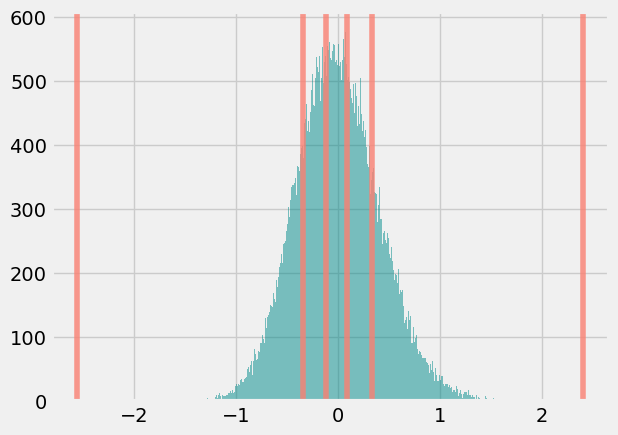

In [90]:
efd_bnds = EFD_bnds(all_grids, 5)
draw_disc(allgrids, efd_bnds)

In [91]:
mjjso_thailand_class = np.empty(mjjaso_thailand.shape) 
for i in range(4):
    for j in range(4):
        grid = mjjaso_thailand[:,:,i,j].reshape(42*165)
        efd_class = EFD_trans(grid, efd_bnds[:,0]).reshape(42, 165)
        mjjso_thailand_class[:,:,i,j] = efd_class
print(mjjso_thailand_class.shape)

(42, 165, 4, 4)


In [92]:
print(max(mjjso_thailand_class.reshape(42*165*4*4)))
print(min(mjjso_thailand_class.reshape(42*165*4*4)))
print(mjjso_thailand_class[0,0,:,:])

4.0
0.0
[[3. 4. 4. 4.]
 [4. 4. 2. 3.]
 [3. 1. 2. 4.]
 [2. 1. 1. 1.]]


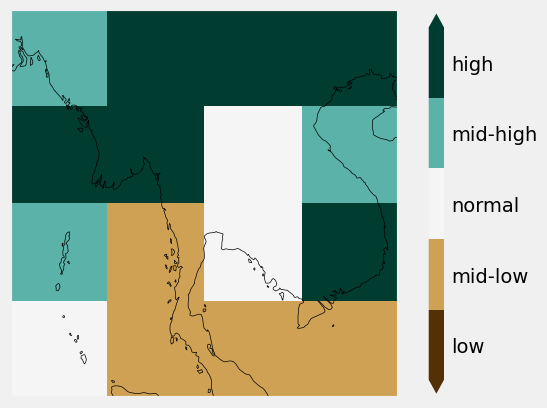

In [93]:
show_class(mjjso_thailand_class[0,0,:,:]) 

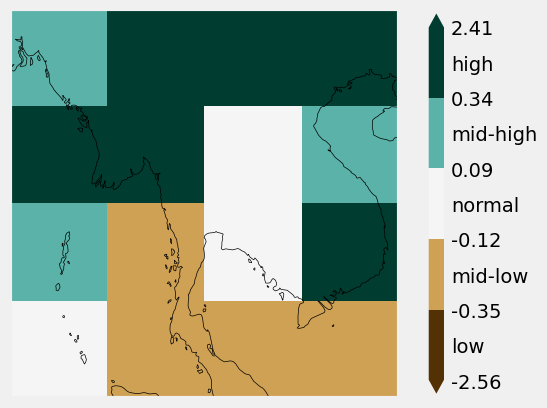

In [95]:
with_continuous(mjjso_thailand_class[0,0,:,:]) 

# position check

In [71]:
        def test(): # check if reshape changes position of index
    data = np.arange(2*3*4*5).reshape(2,3,4,5)
    bnd = [0, 24, 48, 72, 96]
    print(data)
    
    tmp = np.empty(data.shape) 
    for i in range(4):
        for j in range(5):
            grid = data[:,:,i,j].reshape(2*3)
            efd_class = EFD_trans(grid, bnd).reshape(2,3)
            tmp[:,:,i,j] = efd_class
    print(tmp)

test()

[[[[  0   1   2   3   4]
   [  5   6   7   8   9]
   [ 10  11  12  13  14]
   [ 15  16  17  18  19]]

  [[ 20  21  22  23  24]
   [ 25  26  27  28  29]
   [ 30  31  32  33  34]
   [ 35  36  37  38  39]]

  [[ 40  41  42  43  44]
   [ 45  46  47  48  49]
   [ 50  51  52  53  54]
   [ 55  56  57  58  59]]]


 [[[ 60  61  62  63  64]
   [ 65  66  67  68  69]
   [ 70  71  72  73  74]
   [ 75  76  77  78  79]]

  [[ 80  81  82  83  84]
   [ 85  86  87  88  89]
   [ 90  91  92  93  94]
   [ 95  96  97  98  99]]

  [[100 101 102 103 104]
   [105 106 107 108 109]
   [110 111 112 113 114]
   [115 116 117 118 119]]]]
[[[[0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]
   [0. 0. 0. 0. 0.]]

  [[0. 0. 0. 0. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1.]]

  [[1. 1. 1. 1. 1.]
   [1. 1. 1. 2. 2.]
   [2. 2. 2. 2. 2.]
   [2. 2. 2. 2. 2.]]]


 [[[2. 2. 2. 2. 2.]
   [2. 2. 2. 2. 2.]
   [2. 2. 3. 3. 3.]
   [3. 3. 3. 3. 3.]]

  [[3. 3. 3. 3. 3.]
   [3. 3. 3. 3. 3.]
   [3. 3. 3. 3.